<a href="https://colab.research.google.com/github/guilhermeaugusto9/sigmoidal/blob/master/02%20-%20Escola%20de%20Data%20Science/01%20-%20Notebooks/Aula_004_Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png" height="100px"></p>

# Aula 004: Redes Neurais

Redes neurais (NN) são os blocos construtores fundamentais do Deep Learning. Sua popularidade se dá devido a capacidade de lidar com problemas altamente complexos, onde algoritmos tradicionais não foram capazes de obter sucesso.

Entre as principais aplicações das NN estão os carros autônomos, reconhecimento de objetos em imagens, tradução entre idiomas, legendas automáticas em vídeos, entre outras.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/human-neuron.png" height="400px"></p>

Como foi mencionado na apresentação de slides, as NN são inspiradas neurônios biológicos da vida real, aqueles que temos no nosso próprio sistema nervoso - aproximadamente 10 bilhões.

Cada um dos nossos neurônios está conectado a cerca de 10 mil outros neurônios. A comunicação entre esses neurônios ocorre por meio de impulsos captados pelos dendritos. Na sequência, esses impulsos são transmitidos pelo corpo do neurônio, por meio do axônio, até atingirem os dendritos de neurônios vizinhos através de sinapses.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/simple-nn.png" height="300px"></p>

Se ficou difícil de imaginar esse paralelo entre o mundo real e artificial, veja a imagem abaixa comparando redes neurais biológicas e artificiais, bio-inspirados:

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/comparativo_nn.png" height="250px"></p>

Abandonando um pouco 

Em um NN artificial, recebem-se valores $x_1, x_2, x_3$, jutamente com uma constante conhecida como *bias*, que são multiplicados por pesos $w_1, w_2, w_3, w_4$ e somados. Por fim, essa soma passa por uma função de ativação, que irá fornecer o *output*.

Matematicamente, a saída (*output*) da NN pode ser escrita de várias formas diferentes. Tipicamente você irá encontrar  a forma matemática, escrita como uma única equação:

$$
\hat{y} = g \left(w_0 + \sum_{i=1}^{m} x_iw_i \right) \\
$$

ou podemos escrever a mesma coisa usando a Algebra Linear em termos de vetores e produtos escalares:

$$
\hat{y} = g \left( w_0 + X^T W \right) \\
$$

$$
\begin{equation}
\begin{aligned}
X&=
    \begin{bmatrix}
        x_1 \\ \vdots \\ x_2
    \end{bmatrix} 
&&W=
    \begin{bmatrix}
        w_1 \\ \vdots \\ w_m
    \end{bmatrix} \\
\end{aligned}
\end{equation}
$$

### Um exemplo de Rede Neural simples

Veja a imagem abaixo, onde temos uma NN que recebe dois *inputs* e fornece um resultado de saída.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/exemplo-nn.png" height="250px"></p>

Nessa situação acima temos:

$$
\begin{equation}
\begin{aligned}
X&=
    \begin{bmatrix}
        x_1 \\ x_2
    \end{bmatrix} 
&&W=
    \begin{bmatrix}
        -2 \\ \\ 5
    \end{bmatrix}
&&w_0=1
\end{aligned}
\end{equation}
$$

Matematicamente, o resultado final $\hat{y}$ poderia ser escrito como $\hat{y} = g(1 - 2x_1 +5x_2)$. No entanto, isso resolve apenas uma parte do problema.

O poder do *Deep Learning* está em usar a não-lineariedade para resolver problemas complexos. É aí que entra a **função de ativação**, tema muito amplo (e que terá uma aula exclusiva para ele).

Vamos apenas assumir que será usada a **função sigmoidal** (e sua curva ***sigmoidal***) para fornecer à nossa NN essa tal não-lineariedade.

$$
g(z) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Não entendeu essa questão da lineariedade? 

Visualmente, veja na figura abaixo (extraída do MIT) como a parte linear $w_0 + \sum_{i=1}^{m} x_iw_i$ da nossa equação não conseguiria separar corretamente as classes, não importando quantas camadas de neurônios existissem.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/linear-vs-nao-linear.png" height="250px"></p>

Já quando você utiliza essa parte linear dentro de uma função de ativação $\sigma(w_0 + \sum_{i=1}^{m} x_iw_i)$, possibilita que esse tipo de curva não-linear possa ocorrer.

In [ ]:
# importar as bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# configurações do notebook
sns.set_style()

# importar dataset simplificado (variáveis numéricas)
from sklearn.datasets import fetch_california_housing

TensorFlow 2.x selected.


In [ ]:
# exemplo dado na aula de rede neural:
def sigmoid(x): 
    return 1.0/(1 + np.exp(-x))

# valores de input
x1 = 10
x2 = -2

# soma de w0 + X.W
res = 1 -2*x1 + 5*x2

# função de ativação sigmoid
yhat = sigmoid(res)
print(yhat)

2.543665647376276e-13


## Redes Neurais ao *dataset* imobiliário da California

In [ ]:
# importar o dataset e lista com nomes das features
dataset = fetch_california_housing()
features = dataset.feature_names

# dividir entre treino, validação e teste
X_train_original, X_test, y_train_original, y_test = train_test_split(dataset.data, dataset.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_original, y_train_original)

In [ ]:
# ver como ficaria em formato de DataFrame
df = pd.DataFrame(X_train)
df.columns = features
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.9028,25.0,5.470968,0.987097,436.0,2.812903,39.52,-121.49
1,11.2160,36.0,8.443836,1.246575,771.0,2.112329,33.61,-117.91
2,1.9063,21.0,4.463235,1.139706,226.0,1.661765,36.98,-122.02
3,4.0385,12.0,4.565574,0.981557,1122.0,2.299180,33.67,-117.99
4,3.2250,21.0,3.935484,1.163594,1099.0,2.532258,33.66,-117.91


In [ ]:
# padronizar os dados com StandardScaler por causa do Gradient Descent
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
# ver o dataset padronizado
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,0.011008,-0.291465,0.016340,-0.254890,-0.868446,-0.032641,1.822806,-0.955460
1,3.861743,0.585238,1.262597,0.354491,-0.574811,-0.149520,-0.948550,0.829391
2,-1.040240,-0.610267,-0.406112,0.103510,-1.052515,-0.224689,0.631733,-1.219698
3,0.082461,-1.327569,-0.363211,-0.267899,-0.267152,-0.118347,-0.920414,0.789506
4,-0.345884,-0.610267,-0.627351,0.159612,-0.287312,-0.079462,-0.925104,0.829391


In [ ]:
# construir uma nn
model = keras.models.Sequential(
    [
     keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1:])),
     keras.layers.Dense(1)
    ]
)

# compilar a nn 
model.compile(loss='mean_squared_error', optimizer='sgd')

# obter o histórico de loss
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

# verificar o MSE
error = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 71us/sample - loss: 0.7691 - val_loss: 0.4773
Epoch 2/50
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5383 - val_loss: 0.4286
Epoch 3/50
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4690 - val_loss: 0.4083
Epoch 4/50
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4216 - val_loss: 0.3945
Epoch 5/50
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4094 - val_loss: 0.3842
Epoch 6/50
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4006 - val_loss: 0.3761
Epoch 7/50
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3936 - val_loss: 0.3701
Epoch 8/50
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3915 - val_loss: 0.3789
Epoch 9/50
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3872 - val_l

In [ ]:
# fazer uma nova previsão 
new_house = X_train[0].reshape(1,-1)
model.predict(new_house)

array([[1.299606]], dtype=float32)

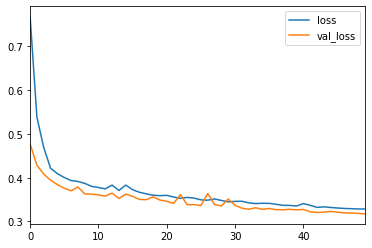

In [ ]:
# plotar historico 
pd.DataFrame(history.history).plot();